<a href="https://colab.research.google.com/github/Aymando10/Data_Science_Health_Informatics/blob/main/Data_Science_For_Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Setup & Early Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/SurveyLungCancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

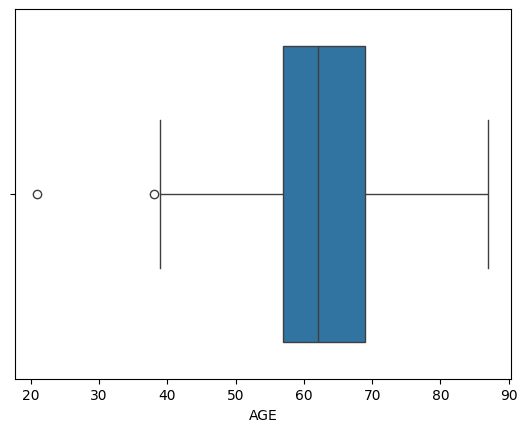

57.0 69.0 12.0


In [ ]:
sns.boxplot(x=df['AGE']);
plt.show()

Q1=df['AGE'].quantile(0.25)
Q3=df['AGE'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

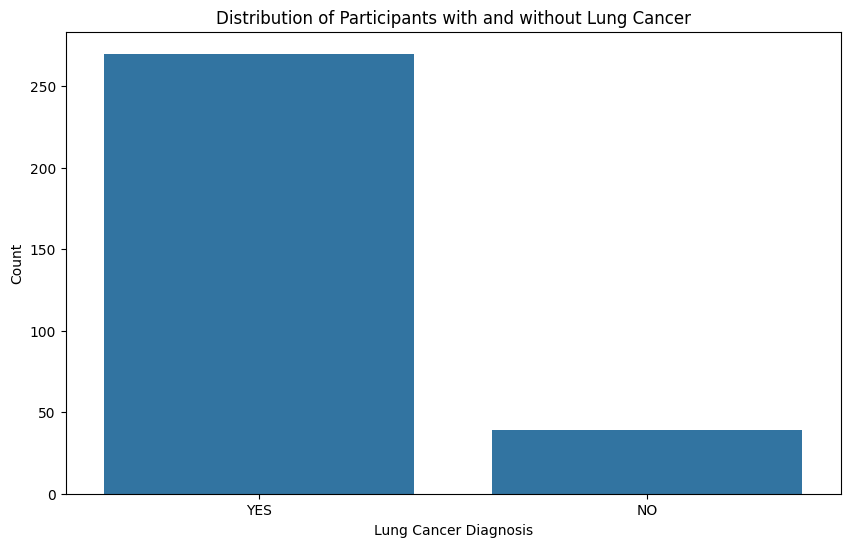

In [ ]:
# Distribution of Participants with and without Lung Cancer
plt.figure(figsize=(10, 6))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Participants with and without Lung Cancer')
plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Count')
plt.show()

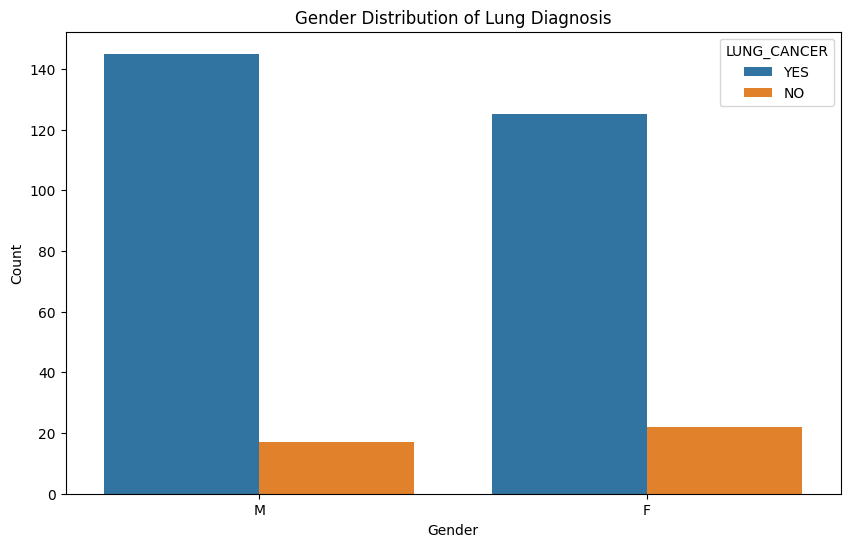

In [ ]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', data=df, hue='LUNG_CANCER')
plt.title('Gender Distribution of Lung Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

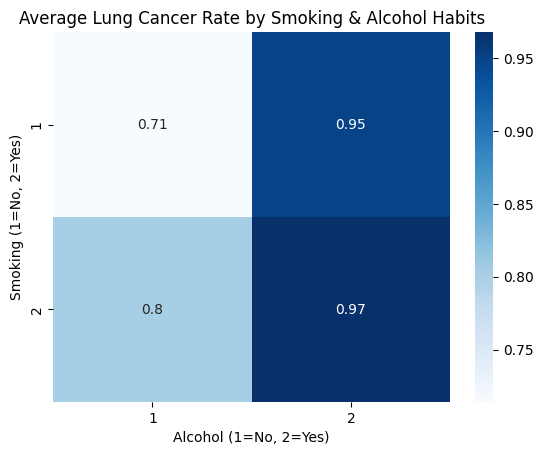

In [ ]:
crosstab = pd.crosstab(df['SMOKING'], df['ALCOHOL CONSUMING'],
                       values=(df['LUNG_CANCER']=='YES').astype(int),
                       aggfunc='mean')
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Average Lung Cancer Rate by Smoking & Alcohol Habits')
plt.xlabel('Alcohol (1=No, 2=Yes)')
plt.ylabel('Smoking (1=No, 2=Yes)')
plt.show()

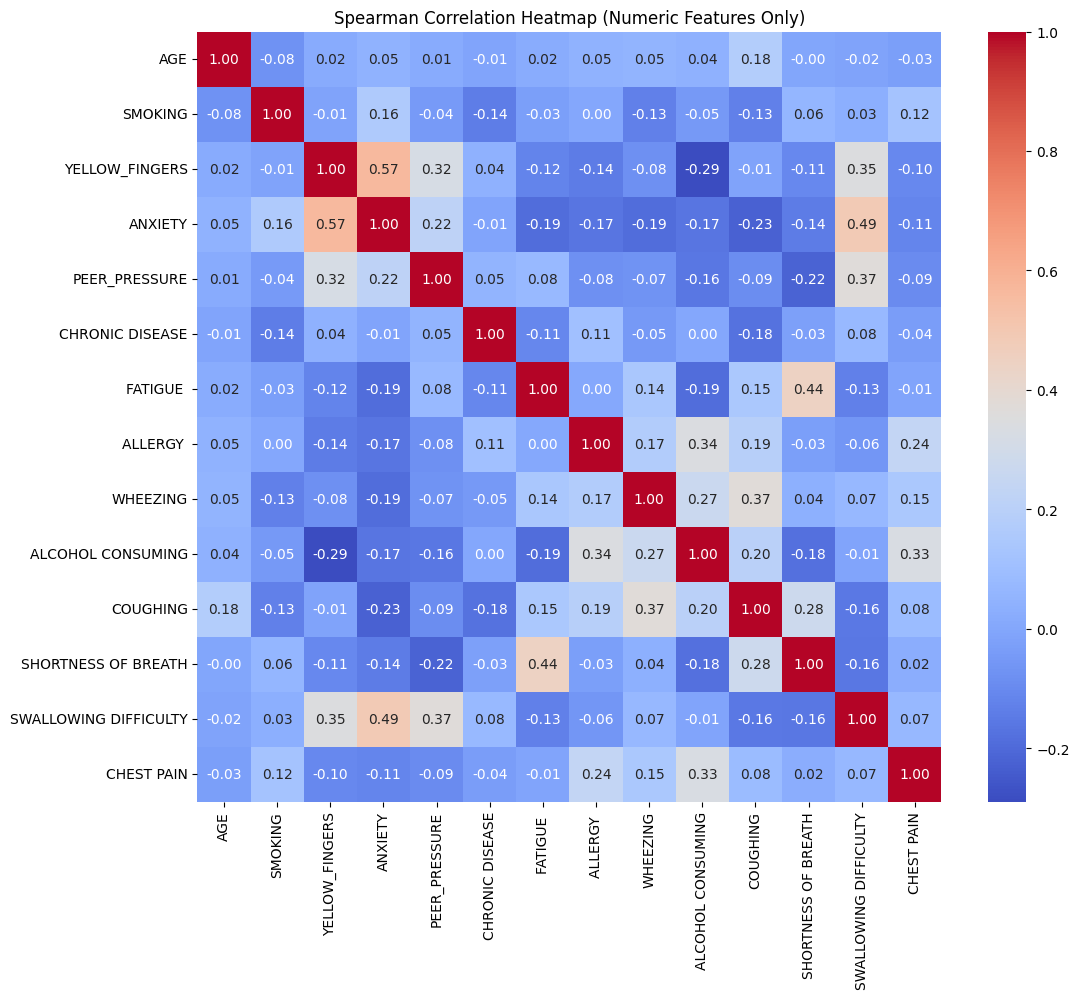

In [ ]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

if 'LUNG_CANCER_NUM' in df.columns:
    numeric_df['LUNG_CANCER_NUM'] = df['LUNG_CANCER_NUM']

# Compute Spearman correlation on numeric data only
plt.figure(figsize=(12,10))
corr = numeric_df.corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Heatmap (Numeric Features Only)')
plt.show()


In [ ]:
# Make sure column names are stripped
df.columns = df.columns.str.strip()

categorical_cols = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

print("\nChi-Square Test Results (feature vs LUNG_CANCER):\n")

chi_results = []

for col in categorical_cols:
    table = pd.crosstab(df[col], df['LUNG_CANCER'])
    chi2, p, dof, exp = chi2_contingency(table)
    chi_results.append((col, chi2, p))
    print(f"{col:25s}  chi2={chi2:.2f}  p={p:.5f}")

chi_df = pd.DataFrame(chi_results, columns=['Feature', 'Chi2', 'p_value'])
display(chi_df.sort_values('p_value'))



Chi-Square Test Results (feature vs LUNG_CANCER):

SMOKING                    chi2=0.72  p=0.39532
YELLOW_FINGERS             chi2=9.09  p=0.00257
ANXIETY                    chi2=5.65  p=0.01747
PEER_PRESSURE              chi2=9.64  p=0.00190
CHRONIC DISEASE            chi2=3.16  p=0.07541
FATIGUE                    chi2=6.08  p=0.01366
ALLERGY                    chi2=31.24  p=0.00000
WHEEZING                   chi2=17.72  p=0.00003
ALCOHOL CONSUMING          chi2=24.01  p=0.00000
COUGHING                   chi2=17.61  p=0.00003
SHORTNESS OF BREATH        chi2=0.79  p=0.37392
SWALLOWING DIFFICULTY      chi2=19.31  p=0.00001
CHEST PAIN                 chi2=10.08  p=0.00150


,Feature,Chi2,p_value
6,ALLERGY,31.238952,2.281422e-08
8,ALCOHOL CONSUMING,24.005406,9.606559e-07
11,SWALLOWING DIFFICULTY,19.307277,1.112814e-05
7,WHEEZING,17.723096,2.555055e-05
9,COUGHING,17.606122,2.717123e-05
12,CHEST PAIN,10.083198,1.496275e-03
3,PEER_PRESSURE,9.641594,1.902201e-03
1,YELLOW_FINGERS,9.088186,2.572659e-03
5,FATIGUE,6.081100,1.366356e-02
2,ANXIETY,5.648390,1.747141e-02


# Data Cleaning

In [ ]:
df.isnull().sum() # No missing values

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()


np.int64(33)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(276, 16)

# Preprocessing

In [ ]:
le = LabelEncoder()

df1 = df.copy(deep=True)